In [ ]:
!pip install -U pip

!pip install -U \
    numpy \
    pandas \
    scipy \
    scikit-learn \
    matplotlib \
    seaborn \
    nltk \
    spacy \
    transformers==4.51.3 \
    datasets \
    accelerate \
    evaluate \
    torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


!python -m spacy download en_core_web_sm

print("\n✅ INSTALLATION COMPLETED. PLEASE 'Runtime' -> 'Restart runtime' NOW.")

from google.colab import drive
drive.mount('/content/drive')
print("\n✅ Google Drive connected.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement transformers==4.51.3 (from versions: none)
ERROR: No matching distribution found for transformers==4.51.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✅ KURULUM TAMAMLANDI. LÜTFEN ŞİMDİ 'Runtime' -> 'Restart runtime' YAPIN.
Mounted at /content/drive

✅ Google Drive bağlandı.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("\n✅ Google Drive connected.")

import pandas as pd
import numpy as np
import os
import re
import sys

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import torch
try:
    import torchvision
    print(f"Torchvision Version: {torchvision.__version__}")
except ImportError:
    print("Torchvision could not be imported.")

!pip install evaluate

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from datasets import Dataset
import evaluate

import spacy

import warnings
warnings.filterwarnings('ignore')

print(f"\nPython Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
try:
    print(f"Scikit-learn Version: {sklearn.__version__}")
except AttributeError:
    print("Scikit-learn Version: Unknown (Could not be imported)")

print(f"NLTK Version: {nltk.__version__}")
print(f"SpaCy Version: {spacy.__version__}")
print(f"PyTorch Version: {torch.__version__}")
try:
    if 'torchvision' in sys.modules:
        print(f"Torchvision Version: {torchvision.__version__}")
    else:
        print("Torchvision Version: Not installed or could not be imported")
except NameError:
    print("Torchvision Version: Not installed or could not be imported")

try:
    import transformers
    print(f"Transformers Version: {transformers.__version__}")
    import datasets
    print(f"Datasets Version: {datasets.__version__}")
    import accelerate
    print(f"Accelerate Version: {accelerate.__version__}")
    import evaluate as hf_evaluate
    print(f"Evaluate Version: {hf_evaluate.__version__}")
    import numpy
    print(f"Numpy Version (after imports): {numpy.__version__}")


except ImportError as e:
    print(f"Some of the Hugging Face libraries may not have been installed: {e}")

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
    print(f"GPU available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not found, CPU will be used.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Google Drive bağlandı.

✅ KURULUM TAMAMLANDI. (Hücre 0'daki kurulumlar kullanılıyor)
Torchvision Versiyonu: 0.21.0+cu124

Python Versiyonu: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
NumPy Versiyonu: 2.0.2
Pandas Versiyonu: 2.2.2
Scikit-learn Versiyonu: 1.6.1
NLTK Versiyonu: 3.9.1
SpaCy Versiyonu: 3.8.6
PyTorch Versiyonu: 2.6.0+cu124
Torchvision Versiyonu: 0.21.0+cu124
Transformers Versiyonu: 4.52.2
Datasets Versiyonu: 2.14.4
Accelerate Versiyonu: 1.7.0
Evaluate Versiyonu: 0.4.3
Numpy Versiyonu (after imports): 2.0.2
GPU bulunamadı, CPU kullanılacak.


In [ ]:
DRIVE_PROJECT_BASE = '/content/drive/MyDrive/LYRICS/unzipped/'

SELECTED_TVT_RATIO = "70_15_15"

BERT_MODEL_NAME = 'bert-base-multilingual-cased'
BERT_MAX_LEN = 128
BERT_BATCH_SIZE = 8
BERT_EPOCHS = 3

BASE_DATA_PATH = os.path.join(DRIVE_PROJECT_BASE, 'MERGE_Lyrics_Balanced')

METADATA_FILE = os.path.join(BASE_DATA_PATH, 'merge_lyrics_balanced_metadata.csv')
AV_VALUES_FILE = os.path.join(BASE_DATA_PATH, 'merge_lyrics_balanced_av_values.csv')

LYRICS_Q1_FOLDER = os.path.join(BASE_DATA_PATH, 'Q1')
LYRICS_Q2_FOLDER = os.path.join(BASE_DATA_PATH, 'Q2')
LYRICS_Q3_FOLDER = os.path.join(BASE_DATA_PATH, 'Q3')
LYRICS_Q4_FOLDER = os.path.join(BASE_DATA_PATH, 'Q4')

TVT_MAIN_FOLDER = os.path.join(BASE_DATA_PATH, 'tvt_dataframes')

TVT_SUBFOLDER_PATH = os.path.join(TVT_MAIN_FOLDER, f"tvt_{SELECTED_TVT_RATIO}")

TRAIN_SET_FILE = os.path.join(TVT_SUBFOLDER_PATH, f"tvt_{SELECTED_TVT_RATIO}_train_lyrics_balanced.csv")
VALIDATION_SET_FILE = os.path.join(TVT_SUBFOLDER_PATH, f"tvt_{SELECTED_TVT_RATIO}_validate_lyrics_balanced.csv")
TEST_SET_FILE = os.path.join(TVT_SUBFOLDER_PATH, f"tvt_{SELECTED_TVT_RATIO}_test_lyrics_balanced.csv")

print(f"TVT Set Ratio to be Used: {SELECTED_TVT_RATIO}")
print(f"Metadata file: {METADATA_FILE}")
print(f"Lyrics Q1 folder: {LYRICS_Q1_FOLDER}")
print(f"Train file path: {TRAIN_SET_FILE}")
print(f"Validation file path: {VALIDATION_SET_FILE}")
print(f"Test file path: {TEST_SET_FILE}")

TARGET_EMOTIONS_LIST = ["mutlu", "üzgün", "nostaljik", "enerjik"]
EMOTION_TO_INT_MAPPING = {"mutlu": 0, "üzgün": 1, "nostaljik": 2, "enerjik": 3}
INT_TO_EMOTION_MAPPING = {v: k for k, v in EMOTION_TO_INT_MAPPING.items()}
NUM_LABELS = len(EMOTION_TO_INT_MAPPING)

BERT_OUTPUT_DIR = os.path.join(DRIVE_PROJECT_BASE, f'bert_model_output_{SELECTED_TVT_RATIO}')
print(f"Folder for BERT model outputs: {BERT_OUTPUT_DIR}")

Kullanılacak TVT Seti Oranı: 70_15_15
Metadata dosyası: /content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_metadata.csv
Q1 şarkı sözleri klasörü: /content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/Q1
Train dosyası yolu: /content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_train_lyrics_balanced.csv
Validation dosyası yolu: /content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_validate_lyrics_balanced.csv
Test dosyası yolu: /content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_test_lyrics_balanced.csv
BERT model çıktıları için klasör: /content/drive/MyDrive/LYRICS/unzipped/bert_model_output_70_15_15


'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_metadata.csv' başarıyla yüklendi.

Ana metadata'da Şarkı ID sütunu ('Song') bulundu ve 'Song ID' olarak standartlaştırıldı.

'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_av_values.csv' başarıyla yüklendi.

'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_av_values.csv' işlendi. (İlk 5 satır av_values_df):
    Song ID  Arousal  Valence
0  L001-141   0.1375   0.7125
1  L002-157   0.2875   0.2125
2  L004-120   0.8250   0.8375
3   L005-84   0.7125   0.7750
4   L007-76   0.1500   0.1000

Metadata ve A/V değerleri birleştirildi.

Birleştirilmiş DataFrame'deki Arousal/Valence NaN sayısı:
Arousal    0
Valence    0
dtype: int64

--- Güncellenmiş metadata_df (A/V birleştirilmiş olabilir) Özeti ---
Toplam satır sayısı: 2400
Arousal değeri olan şarkı sayısı: 2400
Valence değeri olan şarkı sayısı: 2400

İlk 5 satır (güncellenmiş metadata_df):


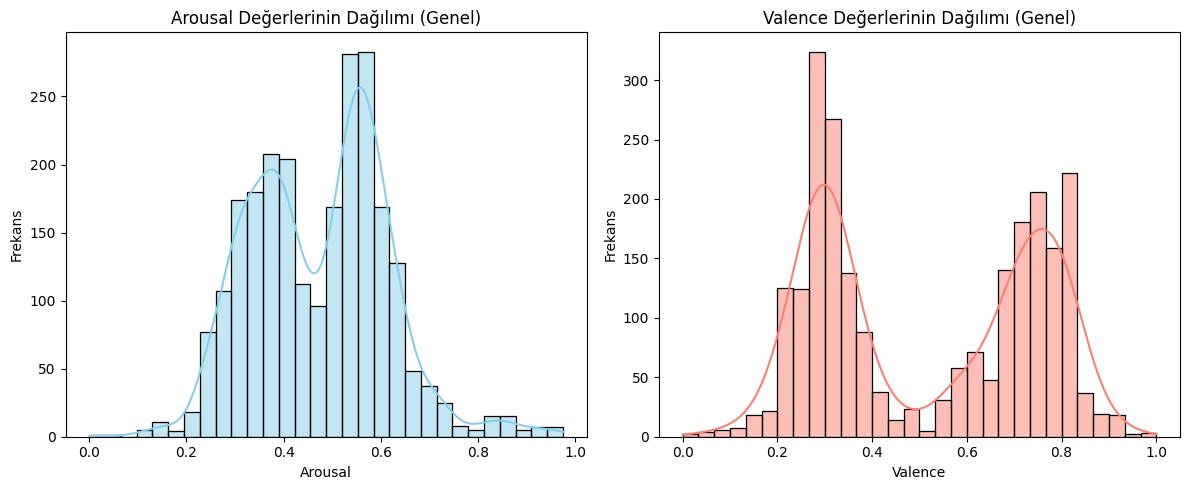

In [ ]:
metadata_df = None
try:
    metadata_df = pd.read_csv(METADATA_FILE)
    print(f"'{METADATA_FILE}' loaded successfully.")

    id_column_in_metadata = 'Song'
    if id_column_in_metadata in metadata_df.columns:
        if id_column_in_metadata != 'Song ID':
            metadata_df.rename(columns={id_column_in_metadata: 'Song ID'}, inplace=True)
        metadata_df['Song ID'] = metadata_df['Song ID'].astype(str).str.strip()
        print(f"\nSong ID column ('{id_column_in_metadata}') found in main metadata and standardized as 'Song ID'.")
    else:
        print(f"ERROR: Expected ID column ('{id_column_in_metadata}') not found in main metadata!")
        metadata_df = None

except FileNotFoundError:
    print(f"ERROR: Metadata file not found: {METADATA_FILE}")
    metadata_df = None
except Exception as e:
    print(f"ERROR: A problem occurred while loading the metadata file: {e}")
    metadata_df = None

av_values_df = None
metadata_with_av_df = metadata_df

if os.path.exists(AV_VALUES_FILE) and metadata_df is not None:
    try:
        av_values_df_raw = pd.read_csv(AV_VALUES_FILE, header=0)
        print(f"\n'{AV_VALUES_FILE}' loaded successfully.")

        if 'Song' in av_values_df_raw.columns:
             av_values_df_raw.rename(columns={'Song': 'Song ID'}, inplace=True)
             av_values_df_raw['Song ID'] = av_values_df_raw['Song ID'].astype(str).str.strip()
        else:
            print(f"WARNING: No ID column named 'Song' found in the A/V file ('{AV_VALUES_FILE}').")

        if 'Arousal' in av_values_df_raw.columns:
            av_values_df_raw['Arousal'] = pd.to_numeric(av_values_df_raw['Arousal'], errors='coerce')
        if 'Valence' in av_values_df_raw.columns:
            av_values_df_raw['Valence'] = pd.to_numeric(av_values_df_raw['Valence'], errors='coerce')

        if 'Song ID' in av_values_df_raw.columns and 'Arousal' in av_values_df_raw.columns and 'Valence' in av_values_df_raw.columns:
            av_values_df = av_values_df_raw[['Song ID', 'Arousal', 'Valence']].dropna(subset=['Arousal', 'Valence'])
            print(f"\n'{AV_VALUES_FILE}' processed. (First 5 rows of av_values_df):")
            print(av_values_df.head())

            if not av_values_df.empty:
                metadata_with_av_df = pd.merge(metadata_df.copy(), av_values_df, on='Song ID', how='left')
                print("\nMetadata and A/V values merged.")
                print("\nNumber of Arousal/Valence NaNs in the merged DataFrame:")
                print(metadata_with_av_df[['Arousal', 'Valence']].isnull().sum())
            else:
                print("WARNING: Processed A/V data (av_values_df) is empty, merging not possible.")
                metadata_with_av_df = metadata_df.copy()
        else:
            print(f"WARNING: Required columns ('Song ID', 'Arousal', 'Valence') not found or could not be read in the A/V file.")
            metadata_with_av_df = metadata_df.copy()

    except Exception as e:
        print(f"WARNING: An issue occurred while loading/processing the Arousal/Valence file ('{AV_VALUES_FILE}'): {e}")
        if metadata_df is not None:
             metadata_with_av_df = metadata_df.copy()
        else:
             metadata_with_av_df = None
else:
    if not os.path.exists(AV_VALUES_FILE):
        print(f"WARNING: Arousal/Valence values file not found: {AV_VALUES_FILE}")
    if metadata_df is None:
        print("WARNING: A/V merging cannot be done because the main metadata file could not be loaded.")
    if metadata_df is not None:
        metadata_with_av_df = metadata_df.copy()

metadata_df = metadata_with_av_df

if metadata_df is not None:
    print("\n--- Summary of updated metadata_df (may have A/V merged) ---")
    print(f"Total number of rows: {len(metadata_df)}")
    if 'Arousal' in metadata_df.columns:
        print(f"Number of songs with Arousal value: {metadata_df['Arousal'].notna().sum()}")
    if 'Valence' in metadata_df.columns:
        print(f"Number of songs with Valence value: {metadata_df['Valence'].notna().sum()}")
    print("\nFirst 5 rows (updated metadata_df):")
    print(metadata_df.head())
else:
    print("\nMetadata (metadata_df) could not be loaded or processed.")

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- End of Cell 3 Graphics ---")

if 'metadata_df' in locals() and metadata_df is not None and \
   'Arousal' in metadata_df.columns and 'Valence' in metadata_df.columns:

    arousal_data = metadata_df['Arousal'].dropna()
    valence_data = metadata_df['Valence'].dropna()

    if not arousal_data.empty and not valence_data.empty:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(arousal_data, kde=True, color="skyblue", bins=30)
        plt.title('Distribution of Arousal Values (General)')
        plt.xlabel('Arousal')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(valence_data, kde=True, color="salmon", bins=30)
        plt.title('Distribution of Valence Values (General)')
        plt.xlabel('Valence')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    else:
        print("Not enough Arousal/Valence data found for the chart (non-NaN).")
else:
    print("metadata_df or Arousal/Valence columns not found for general A/V distribution chart.")

--- A/V Eşik Değerleri (v9 Ayarlanabilir) ---
Genel Arousal: Low < 0.39, Median=0.50, High > 0.55
Genel Valence: Low < 0.31, Median=0.50, High > 0.70
Nostaljik A Aralığı: [0.30 - 0.55]
Nostaljik V Aralığı: [0.30 - 0.65]
Mutlu (Q2) Max A: 0.60, Min V: 0.45
Enerjik Min A: 0.55, Min V: 0.55

--- Duygu Eşleştirme Stratejisi (v9 - Accuracy Odaklı) ---

Eşleştirme sonrası 'target_emotion_raw' dağılımı (FİLTRELEMEDEN ÖNCE):
target_emotion_raw
mutlu         638
üzgün         602
enerjik       512
nostaljik     390
bilinmiyor    258
Name: count, dtype: int64

Filtrelemede kullanılacak hedef duygu anahtarları: ['mutlu', 'üzgün', 'nostaljik', 'enerjik']

Başarılı eşleştirme sonrası ('processed_metadata_df') 'target_emotion_raw' dağılımı:
target_emotion_raw
mutlu        638
üzgün        602
enerjik      512
nostaljik    390
Name: count, dtype: int64
Toplam işlenmiş şarkı sayısı: 2142

Sayısal etiket ('emotion_label') dağılımı:
emotion_label
0    638
1    602
3    512
2    390
Name: count, dtype: i

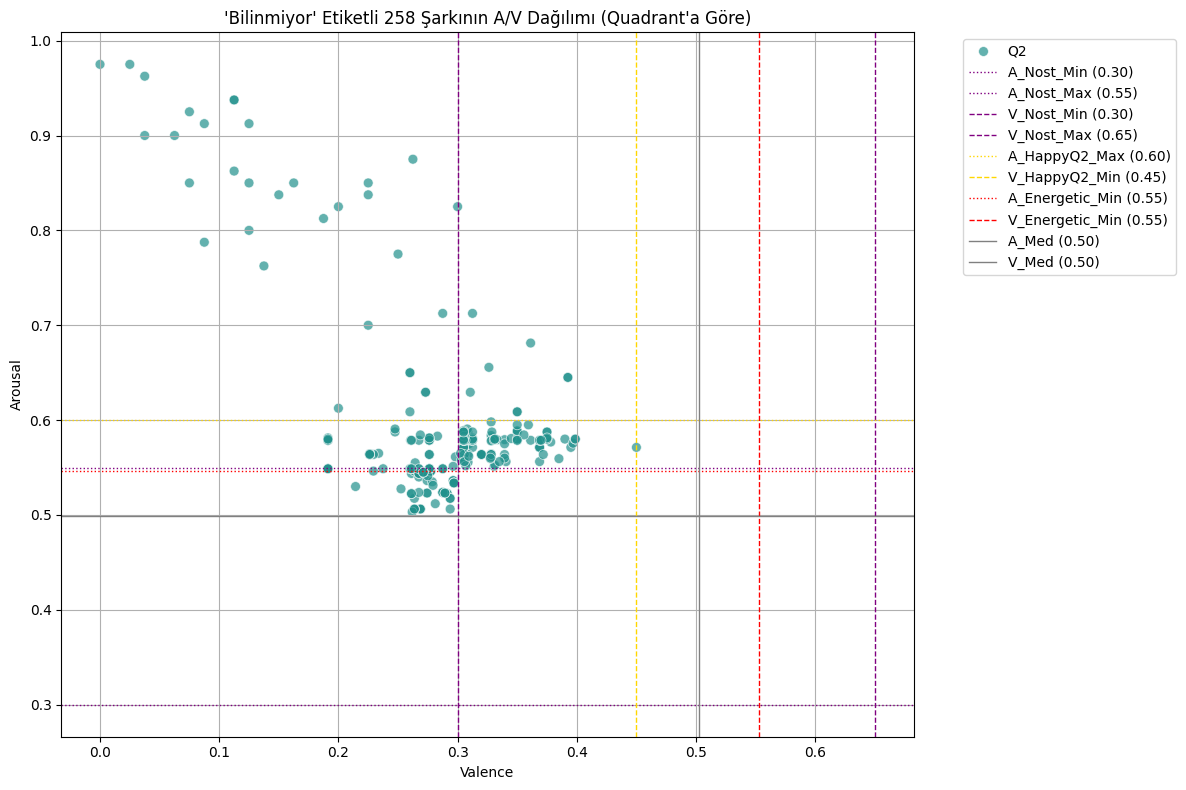

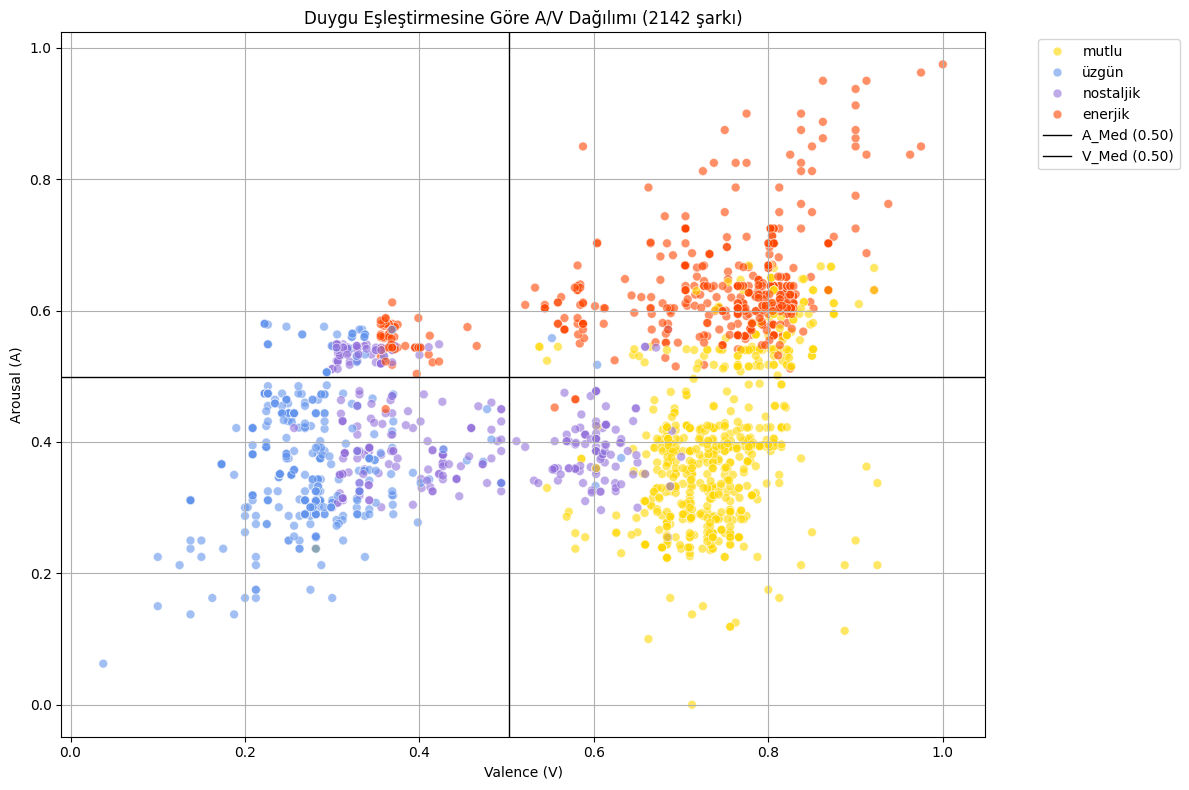


--- Hücre 4 Sonu Ek Grafikleri ---


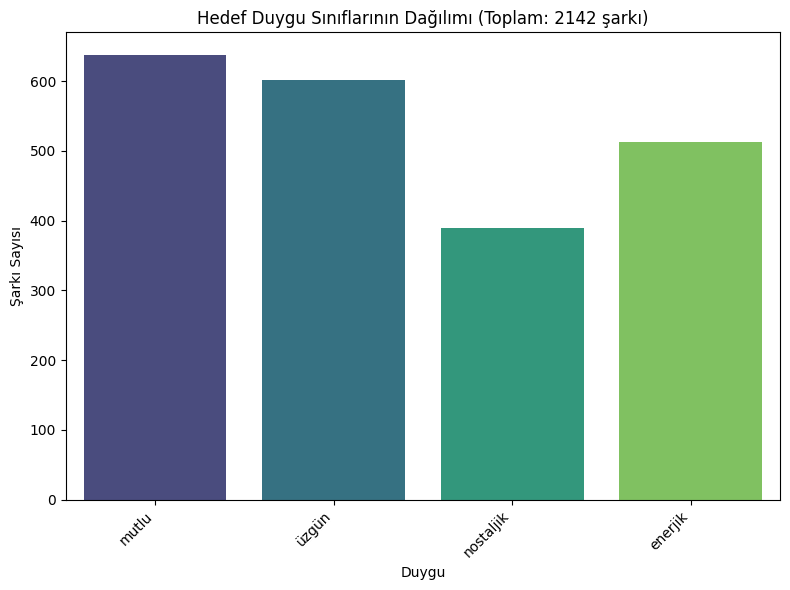

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

processed_metadata_df = None

USE_MOODS_COLUMN = True
MOODS_COLUMN_NAME = 'Moods'

if 'metadata_df' in locals() and metadata_df is not None and \
   'Arousal' in metadata_df.columns and 'Valence' in metadata_df.columns:

    A_MEDIAN = metadata_df['Arousal'].median()
    A_P33 = metadata_df['Arousal'].quantile(0.33)
    A_P66 = metadata_df['Arousal'].quantile(0.66)
    A_P25 = metadata_df['Arousal'].quantile(0.25)
    A_P75 = metadata_df['Arousal'].quantile(0.75)

    V_MEDIAN = metadata_df['Valence'].median()
    V_P33 = metadata_df['Valence'].quantile(0.33)
    V_P66 = metadata_df['Valence'].quantile(0.66)
    V_P25 = metadata_df['Valence'].quantile(0.25)
    V_P75 = metadata_df['Valence'].quantile(0.75)

    A_THRESHOLD_LOW = A_P33
    A_THRESHOLD_HIGH = A_P66
    V_THRESHOLD_LOW = V_P33
    V_THRESHOLD_HIGH = V_P66

    A_NOSTALGIC_MIN = 0.30
    A_NOSTALGIC_MAX = 0.55
    V_NOSTALGIC_MIN = 0.30
    V_NOSTALGIC_MAX = 0.65

    A_HAPPY_Q2_MAX = 0.60
    V_HAPPY_Q2_MIN = 0.45

    A_ENERGETIC_MIN = A_THRESHOLD_HIGH
    V_ENERGETIC_MIN = V_MEDIAN + 0.05

    print(f"--- A/V Threshold Values (v9 Adjustable) ---")
    print(f"General Arousal: Low < {A_THRESHOLD_LOW:.2f}, Median={A_MEDIAN:.2f}, High > {A_THRESHOLD_HIGH:.2f}")
    print(f"General Valence: Low < {V_THRESHOLD_LOW:.2f}, Median={V_MEDIAN:.2f}, High > {V_THRESHOLD_HIGH:.2f}")
    print(f"Nostalgic A Range: [{A_NOSTALGIC_MIN:.2f} - {A_NOSTALGIC_MAX:.2f}]")
    print(f"Nostalgic V Range: [{V_NOSTALGIC_MIN:.2f} - {V_NOSTALGIC_MAX:.2f}]")
    print(f"Happy (Q2) Max A: {A_HAPPY_Q2_MAX:.2f}, Min V: {V_HAPPY_Q2_MIN:.2f}")
    print(f"Energetic Min A: {A_ENERGETIC_MIN:.2f}, Min V: {V_ENERGETIC_MIN:.2f}")

else:
    print("WARNING: metadata_df could not be loaded or Arousal/Valence columns are missing. Thresholds set to default.")
    A_THRESHOLD_LOW, A_MEDIAN, A_THRESHOLD_HIGH = 0.35, 0.5, 0.65
    V_THRESHOLD_LOW, V_MEDIAN, V_THRESHOLD_HIGH = 0.35, 0.5, 0.65
    A_NOSTALGIC_MIN, A_NOSTALGIC_MAX = 0.30, 0.55
    V_NOSTALGIC_MIN, V_NOSTALGIC_MAX = 0.35, 0.65
    A_HAPPY_Q2_MAX, V_HAPPY_Q2_MIN = 0.60, 0.45
    A_ENERGETIC_MIN, V_ENERGETIC_MIN = 0.55, 0.55

MOOD_KEYWORDS_V9 = {
    "mutlu": ["joyful", "happy", "cheerful", "elated", "upbeat", "positive", "bright", "content", "pleased", "optimistic", "blissful", "radiant", "feel good", "carefree", "lighthearted", "peaceful", "calm", "serene", "gentle", "tender", "sweet", "hopeful", "delicate"],
    "üzgün": ["sad", "gloomy", "melancholy", "depressed", "somber", "mournful", "sorrowful", "unhappy", "heartbroken", "blue", "downbeat", "pessimistic", "anguished", "despairing", "tearful", "cry", "grief", "bleak", "negative", "lonely", "empty"],
    "enerjik": ["energetic", "driving", "rousing", "enthusiastic", "lively", "active", "dynamic", "vibrant", "powerful", "intense", "explosive", "fiery", "wild", "manic", "frenetic", "party", "dance", "workout", "pumped up", "aggressive", "rebellious", "excited", "thrilling", "fast", "intense"],
    "nostaljik": ["nostalgic", "reminiscent", "sentimental", "wistful", "reflective", "yearning", "longing", "dreamy", "pensive", "memories", "past", "yesterday", "old times", "bittersweet", "atmospheric", "ethereal", "autumnal", "bygone", "historic", "vintage"]
}
Q4_SPECIFIC_NEGATIVE_MOODS = ["nervous", "jittery", "angry", "menacing", "nihilistic", "paranoid", "belligerent", "anguished/distraught", "cynical/sarcastic", "sleazy", "hostile", "volatile", "outrageous", "reckless", "trashy"]


if 'EMOTION_TO_INT_MAPPING' not in locals():
    EMOTION_TO_INT_MAPPING = {"mutlu": 0, "üzgün": 1, "nostaljik": 2, "enerjik": 3}
if 'TARGET_EMOTIONS_LIST' not in locals():
    TARGET_EMOTIONS_LIST = list(EMOTION_TO_INT_MAPPING.keys())

def map_emotion_v9(row, use_moods, moods_col_name, mood_keywords_main, q4_specific_negative_kws,
                   a_low_gen, a_high_gen, v_low_gen, v_high_gen,
                   a_nost_min, a_nost_max, v_nost_min, v_nost_max,
                   a_happy_q2_max, v_happy_q2_min,
                   a_energetic_min, v_energetic_min,
                   a_med, v_med):
    arousal = row['Arousal']
    valence = row['Valence']
    quadrant_str = str(row['Quadrant']).strip().upper()
    moods_data = str(row.get(moods_col_name, '')).lower() if use_moods else ""

    assigned_emotion = "bilinmiyor"

    if use_moods and moods_data:
        priority_order = ["nostaljik", "enerjik", "üzgün", "mutlu"]
        matched_emotions_from_moods = []

        for emotion in priority_order:
            if any(keyword in moods_data for keyword in mood_keywords_main.get(emotion, [])):
                matched_emotions_from_moods.append(emotion)

        if len(matched_emotions_from_moods) == 1:
            potential_emotion = matched_emotions_from_moods[0]
            valid_mood_assignment = True
            if potential_emotion == "enerjik" and (arousal < a_med - 0.05 or valence < v_med - 0.15): valid_mood_assignment = False
            if potential_emotion == "üzgün" and (arousal > a_med + 0.15 or valence > v_med + 0.15): valid_mood_assignment = False
            if potential_emotion == "mutlu" and (valence < v_low_gen - 0.05 or arousal > a_high_gen + 0.15) : valid_mood_assignment = False
            if potential_emotion == "nostaljik" and \
               (arousal < a_nost_min - 0.05 or arousal > a_nost_max + 0.05 or \
                valence < v_nost_min - 0.05 or valence > v_nost_max + 0.05): valid_mood_assignment = False

            if valid_mood_assignment:
                assigned_emotion = potential_emotion

    if assigned_emotion == "bilinmiyor":
        if quadrant_str == 'Q1':
            if arousal >= a_energetic_min and valence >= v_energetic_min:
                assigned_emotion = "enerjik"
            elif arousal >= a_med and valence >= v_med:
                has_energetic_mood = use_moods and moods_data and any(kw in moods_data for kw in mood_keywords_main.get("enerjik",[]))
                has_happy_mood = use_moods and moods_data and any(kw in moods_data for kw in mood_keywords_main.get("mutlu",[]))
                if has_energetic_mood and not has_happy_mood: assigned_emotion = "enerjik"
                elif has_happy_mood and not has_energetic_mood: assigned_emotion = "mutlu"
                elif arousal > valence : assigned_emotion = "enerjik"
                else: assigned_emotion = "mutlu"
            elif valence >= v_high_gen and arousal > a_med :
                assigned_emotion = "mutlu"

        elif quadrant_str == 'Q2':
            if (a_nost_min <= arousal <= a_nost_max) and (v_nost_min <= valence <= v_nost_max):
                assigned_emotion = "nostaljik"
            elif (arousal <= a_happy_q2_max) and (valence >= v_happy_q2_min):
                assigned_emotion = "mutlu"
            elif valence >= v_med and arousal <= a_med:
                 assigned_emotion = "mutlu"

        elif quadrant_str == 'Q3':
            if (a_nost_min <= arousal <= a_nost_max) and (v_nost_min <= valence <= v_nost_max):
                assigned_emotion = "nostaljik"
            elif arousal <= a_low_gen and valence <= v_low_gen:
                assigned_emotion = "üzgün"
            elif arousal <= a_med and valence <= v_med:
                assigned_emotion = "üzgün"

        elif quadrant_str == 'Q4':
            is_q4_neg_mood = use_moods and moods_data and any(kw in moods_data for kw in q4_specific_negative_kws)
            has_energetic_mood = use_moods and moods_data and any(kw in moods_data for kw in mood_keywords_main.get("enerjik",[]))

            if is_q4_neg_mood:
                assigned_emotion = "bilinmiyor"
            elif has_energetic_mood and (arousal >= a_energetic_min and valence <= v_med):
                assigned_emotion = "enerjik"
            elif arousal >= a_med and valence <= v_med:
                if (arousal - valence) > 0.25 :
                     assigned_emotion = "enerjik"

    if assigned_emotion == "bilinmiyor":
        if arousal >= a_energetic_min + 0.05 and valence >= v_energetic_min + 0.05 : assigned_emotion = "enerjik"
        elif arousal <= a_low_gen - 0.05 and valence <= v_low_gen - 0.05: assigned_emotion = "üzgün"
        elif (a_nost_min <= arousal <= a_nost_max) and (v_nost_min <= valence <= v_nost_max): assigned_emotion = "nostaljik"
        elif (arousal <= a_happy_q2_max) and (valence >= v_happy_q2_min) and valence >= v_med :
            assigned_emotion = "mutlu"
        elif valence >= v_high_gen + 0.05 and (a_low_gen < arousal < a_high_gen): assigned_emotion = "mutlu"

    return assigned_emotion

if 'metadata_df' in locals() and metadata_df is not None and \
   'Song ID' in metadata_df.columns and \
   'Quadrant' in metadata_df.columns and \
   'Arousal' in metadata_df.columns and \
   'Valence' in metadata_df.columns:

    print("\n--- Emotion Mapping Strategy (v9 - Accuracy Focused) ---")
    if USE_MOODS_COLUMN and MOODS_COLUMN_NAME not in metadata_df.columns:
        print(f"UYARI: USE_MOODS_COLUMN=True ancak '{MOODS_COLUMN_NAME}' sütunu metadata_df'te bulunamadı. Moods kullanılmayacak.")
        current_use_moods = False
    else:
        current_use_moods = USE_MOODS_COLUMN

    temp_metadata_df = metadata_df.copy()

    temp_metadata_df['target_emotion_raw'] = temp_metadata_df.apply(
        lambda row: map_emotion_v9(
            row, current_use_moods, MOODS_COLUMN_NAME, MOOD_KEYWORDS_V9, Q4_SPECIFIC_NEGATIVE_MOODS,
            A_THRESHOLD_LOW, A_THRESHOLD_HIGH, V_THRESHOLD_LOW, V_THRESHOLD_HIGH,
            A_NOSTALGIC_MIN, A_NOSTALGIC_MAX, V_NOSTALGIC_MIN, V_NOSTALGIC_MAX,
            A_HAPPY_Q2_MAX, V_HAPPY_Q2_MIN,
            A_ENERGETIC_MIN, V_ENERGETIC_MIN,
            A_MEDIAN, V_MEDIAN
        ), axis=1
    )

    print("\nDistribution of 'target_emotion_raw' after mapping (BEFORE FILTERING):")
    print(temp_metadata_df['target_emotion_raw'].value_counts(dropna=False))

    target_emotion_keys = list(EMOTION_TO_INT_MAPPING.keys())
    print(f"\nTarget emotion keys to be used in filtering: {target_emotion_keys}")

    processed_metadata_df = temp_metadata_df[temp_metadata_df['target_emotion_raw'].isin(target_emotion_keys)].copy()

    if processed_metadata_df.empty:
        print("KRİTİK UYARI: Duygu eşleştirme sonrası HİÇ geçerli şarkı kalmadı!")
    else:
        processed_metadata_df['emotion_label'] = processed_metadata_df['target_emotion_raw'].map(EMOTION_TO_INT_MAPPING)
        print("\nDistribution of 'target_emotion_raw' after successful mapping ('processed_metadata_df'):")
        print(processed_metadata_df['target_emotion_raw'].value_counts())
        print(f"Total number of processed songs: {len(processed_metadata_df)}")
        print("\nDistribution of numerical labels ('emotion_label'):")
        print(processed_metadata_df['emotion_label'].value_counts())

        print("\nMatching Examples (First 15 - For more details):")
        cols_to_show = ['Song ID', 'Quadrant', 'Arousal', 'Valence', 'target_emotion_raw']
        if current_use_moods and MOODS_COLUMN_NAME in processed_metadata_df.columns:
            cols_to_show.insert(4, MOODS_COLUMN_NAME)
        print(processed_metadata_df[cols_to_show].head(15))

        bilinmiyor_df = temp_metadata_df[temp_metadata_df['target_emotion_raw'] == "bilinmiyor"]
        if not bilinmiyor_df.empty:
            print(f"\n--- Analysis of {len(bilinmiyor_df)} Songs Labeled 'bilinmiyor' ---")
            print("Quadrant distribution of those remaining 'bilinmiyor':")
            print(bilinmiyor_df['Quadrant'].value_counts())
            if current_use_moods and MOODS_COLUMN_NAME in bilinmiyor_df.columns:
                print("\nMoods labels of those remaining 'bilinmiyor' (Top 10 most frequent):")
                print(bilinmiyor_df[MOODS_COLUMN_NAME].value_counts().nlargest(10))
                bilinmiyor_q2_moods = bilinmiyor_df[bilinmiyor_df['Quadrant'] == 'Q2'][MOODS_COLUMN_NAME].value_counts().nlargest(10)
                if not bilinmiyor_q2_moods.empty:
                    print("\nQ2 Moods labels of those remaining 'bilinmiyor' (Top 10 most frequent):")
                    print(bilinmiyor_q2_moods)
                bilinmiyor_q4_moods = bilinmiyor_df[bilinmiyor_df['Quadrant'] == 'Q4'][MOODS_COLUMN_NAME].value_counts().nlargest(10)
                if not bilinmiyor_q4_moods.empty:
                    print("\nQ4 Moods labels of those remaining 'bilinmiyor' (Top 10 most frequent):")
                    print(bilinmiyor_q4_moods)


            plt.figure(figsize=(12,8))
            sns.scatterplot(data=bilinmiyor_df, x='Valence', y='Arousal', hue='Quadrant',
                            alpha=0.7, s=50, palette="viridis")
            plt.title(f"A/V Distribution of {len(bilinmiyor_df)} Songs Labeled as 'bilinmiyor' (By Quadrant)")
            plt.xlabel('Valence')
            plt.ylabel('Arousal')
            plt.grid(True)
            plt.axhline(A_NOSTALGIC_MIN, color='purple', linestyle=':', linewidth=1, label=f'A_Nost_Min ({A_NOSTALGIC_MIN:.2f})')
            plt.axhline(A_NOSTALGIC_MAX, color='purple', linestyle=':', linewidth=1, label=f'A_Nost_Max ({A_NOSTALGIC_MAX:.2f})')
            plt.axvline(V_NOSTALGIC_MIN, color='purple', linestyle='--', linewidth=1, label=f'V_Nost_Min ({V_NOSTALGIC_MIN:.2f})')
            plt.axvline(V_NOSTALGIC_MAX, color='purple', linestyle='--', linewidth=1, label=f'V_Nost_Max ({V_NOSTALGIC_MAX:.2f})')

            plt.axhline(A_HAPPY_Q2_MAX, color='gold', linestyle=':', linewidth=1, label=f'A_HappyQ2_Max ({A_HAPPY_Q2_MAX:.2f})')
            plt.axvline(V_HAPPY_Q2_MIN, color='gold', linestyle='--', linewidth=1, label=f'V_HappyQ2_Min ({V_HAPPY_Q2_MIN:.2f})')

            plt.axhline(A_ENERGETIC_MIN, color='red', linestyle=':', linewidth=1, label=f'A_Energetic_Min ({A_ENERGETIC_MIN:.2f})')
            plt.axvline(V_ENERGETIC_MIN, color='red', linestyle='--', linewidth=1, label=f'V_Energetic_Min ({V_ENERGETIC_MIN:.2f})')

            plt.axhline(A_MEDIAN, color='grey', linestyle='-', linewidth=1, label=f'A_Med ({A_MEDIAN:.2f})')
            plt.axvline(V_MEDIAN, color='grey', linestyle='-', linewidth=1, label=f'V_Med ({V_MEDIAN:.2f})')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
        else:
            print("\nHarika! 'Bilinmiyor' etiketli şarkı bulunmuyor.")

        plt.figure(figsize=(12, 8))
        if not processed_metadata_df.empty:
            emotion_palette = {
                "mutlu": "gold", "üzgün": "cornflowerblue",
                "enerjik": "orangered", "nostaljik": "mediumpurple",
            }
            hue_order = [e for e in TARGET_EMOTIONS_LIST if e in processed_metadata_df['target_emotion_raw'].unique()]
            current_palette = {k: emotion_palette.get(k, "grey") for k in hue_order}

            sns.scatterplot(data=processed_metadata_df.dropna(subset=['Arousal', 'Valence']),
                            x='Valence', y='Arousal', hue='target_emotion_raw',
                            hue_order=hue_order,
                            palette=current_palette,
                            alpha=0.6, s=40)
            plt.title(f'A/V Distribution by Emotion Mapping ({len(processed_metadata_df)} songs)')
            plt.xlabel('Valence (V)')
            plt.ylabel('Arousal (A)')
            plt.grid(True)
            plt.axhline(A_MEDIAN, color='black', linestyle='-', linewidth=1, label=f'A_Med ({A_MEDIAN:.2f})')
            plt.axvline(V_MEDIAN, color='black', linestyle='-', linewidth=1, label=f'V_Med ({V_MEDIAN:.2f})')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
        else:
            print("Processed data (processed_metadata_df) is empty, cannot draw general scatter plot.")
else:
    print("HATA: Metadata (metadata_df) yüklenemedi veya gerekli sütunlar ('Song ID', 'Quadrant', 'Arousal', 'Valence') eksik. Duygu eşleştirme yapılamadı.")

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- End of Cell 4 Additional Graphics ---")

if 'processed_metadata_df' in locals() and processed_metadata_df is not None and not processed_metadata_df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=processed_metadata_df, x='target_emotion_raw', order=TARGET_EMOTIONS_LIST, palette="viridis")
    plt.title(f'Distribution of Target Emotion Classes (Total: {len(processed_metadata_df)} songs)')
    plt.xlabel('Emotion')
    plt.ylabel('Number of Songs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("processed_metadata_df not found or is empty, cannot plot emotion distribution chart.")

In [ ]:
av_file_path = '/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_av_values.csv'

print(f"Reading the first 10 lines of '{av_file_path}':\n")
try:
    with open(av_file_path, 'r', encoding='utf-8') as f:
        for i in range(10):
            line = f.readline()
            if not line:
                break
            print(line.strip())
except FileNotFoundError:
    print(f"ERROR: File not found: {av_file_path}")
except Exception as e:
    print(f"ERROR: An issue occurred while reading the file: {e}")

print("\n--- Reading attempt with Pandas (with different delimiters) ---")
try:
    print("\nAttempt 1: delimiter=','")
    df_test_comma = pd.read_csv(av_file_path, nrows=5)
    print(df_test_comma.head())
    print(df_test_comma.info())
except Exception as e:
    print(f"  Failed: {e}")

try:
    print("\nAttempt 2: delim_whitespace=True")
    df_test_space = pd.read_csv(av_file_path, delim_whitespace=True, nrows=5, header=None)
    print(df_test_space.head())
    print(df_test_space.info())
except Exception as e:
    print(f"  Failed: {e}")

try:
    print("\nAttempt 3: delimiter=',' and skip the first row")
    df_test_comma_skip = pd.read_csv(av_file_path, delimiter=',', skiprows=1, nrows=5, header=None, names=['Song ID', 'Arousal_str', 'Valence_str'])
    print(df_test_comma_skip.head())
    print(df_test_comma_skip.info())
except Exception as e:
    print(f"  Failed: {e}")

'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/merge_lyrics_balanced_av_values.csv' dosyasının ilk 10 satırı okunuyor:

Song,Arousal,Valence
L001-141,0.1375,0.7125
L002-157,0.2875,0.21250000000000002
L004-120,0.825,0.8375
L005-84,0.7125,0.775
L007-76,0.15000000000000002,0.09999999999999998
L008-146,0.25,0.3125
L009-151,0.16249999999999998,0.6875
L010-168,0.2875,0.6875
L011-156,0.3625,0.625

--- Pandas ile okuma denemesi (farklı ayırıcılarla) ---

Deneme 1: delimiter=','
       Song  Arousal  Valence
0  L001-141   0.1375   0.7125
1  L002-157   0.2875   0.2125
2  L004-120   0.8250   0.8375
3   L005-84   0.7125   0.7750
4   L007-76   0.1500   0.1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Song     5 non-null      object 
 1   Arousal  5 non-null      float64
 2   Valence  5 non-null      float64
dtypes: float64(2), object(1)
memory usa

In [ ]:
quadrant_folders_map = {
    1: LYRICS_Q1_FOLDER, 2: LYRICS_Q2_FOLDER,
    3: LYRICS_Q3_FOLDER, 4: LYRICS_Q4_FOLDER
}

def load_lyrics_from_file(song_id_str, quadrant_value_from_df):
    song_id_str = str(song_id_str).strip()
    quadrant_num_int = None

    if isinstance(quadrant_value_from_df, str):
        q_str_upper = quadrant_value_from_df.strip().upper()
        if q_str_upper == "Q1": quadrant_num_int = 1
        elif q_str_upper == "Q2": quadrant_num_int = 2
        elif q_str_upper == "Q3": quadrant_num_int = 3
        elif q_str_upper == "Q4": quadrant_num_int = 4
    elif isinstance(quadrant_value_from_df, (int, float)):
         quadrant_num_int = int(quadrant_value_from_df)

    if quadrant_num_int is None:
        return None

    folder_path = quadrant_folders_map.get(quadrant_num_int)
    if not folder_path:
        return None

    cleaned_song_id = song_id_str.split('.')[0] if '.' in song_id_str else song_id_str
    filename_to_try = f"{cleaned_song_id}.txt"
    file_path = os.path.join(folder_path, filename_to_try)

    if os.path.exists(file_path):
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
                if content.strip():
                    return content
            return None
        except Exception as e:
            return None
    return None

if processed_metadata_df is not None and not processed_metadata_df.empty:
    if 'Song ID' in processed_metadata_df.columns and 'Quadrant' in processed_metadata_df.columns:
        sample_row_lyrics = processed_metadata_df.iloc[0]
        print(f"\nFor lyrics loading test: ID='{sample_row_lyrics['Song ID']}', Quadrant='{sample_row_lyrics['Quadrant']}'")

        lyrics_content_example = load_lyrics_from_file(sample_row_lyrics['Song ID'], sample_row_lyrics['Quadrant'])

        if lyrics_content_example:
            print(f"Example lyrics loading test SUCCESSFUL (ID: {sample_row_lyrics['Song ID']}).")
            print(f"   Content (first 100 chars): {lyrics_content_example[:100].replace(os.linesep, ' ')}...")
        else:
            print(f"Example lyrics loading test FAILED (ID: {sample_row_lyrics['Song ID']}).")
            print(f"   Check: Is the file '{sample_row_lyrics['Song ID']}.txt' in the folder {quadrant_folders_map.get(1 if sample_row_lyrics['Quadrant']=='Q1' else (2 if sample_row_lyrics['Quadrant']=='Q2' else (3 if sample_row_lyrics['Quadrant']=='Q3' else 4)))}?")
    else:
        print("\n'Song ID' or 'Quadrant' column not found in processed metadata for testing.")
else:
    print("\nProcessed metadata (processed_metadata_df) is empty/missing, skipping lyrics loading test.")


Şarkı sözü yükleme testi için: ID='L001-141', Quadrant='Q4'
Örnek şarkı sözü yükleme testi BAŞARILI (ID: L001-141).
   İçerik (ilk 100 krk): Want to find out where the moon goes When it leaves the western sky And night dissolves again to mor...



'70_15_15' TVT seti yükleniyor ve işleniyor...

'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_train_lyrics_balanced.csv' yüklendi, 1680 satır.
   '/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_train_lyrics_balanced.csv' dosyasında ID sütunu olarak 'Song' kullanıldı (Song ID'ye maplendi).
   '/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_train_lyrics_balanced.csv' ana metadata ile birleştirildi, 1490 eşleşen şarkı bulundu.
   Şarkı sözleri yüklendi, geçerli şarkı sayısı: 1490

'/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_validate_lyrics_balanced.csv' yüklendi, 360 satır.
   '/content/drive/MyDrive/LYRICS/unzipped/MERGE_Lyrics_Balanced/tvt_dataframes/tvt_70_15_15/tvt_70_15_15_validate_lyrics_balanced.csv' dosyasında ID sütunu olarak 'Song' kullanıldı (Song ID'ye m

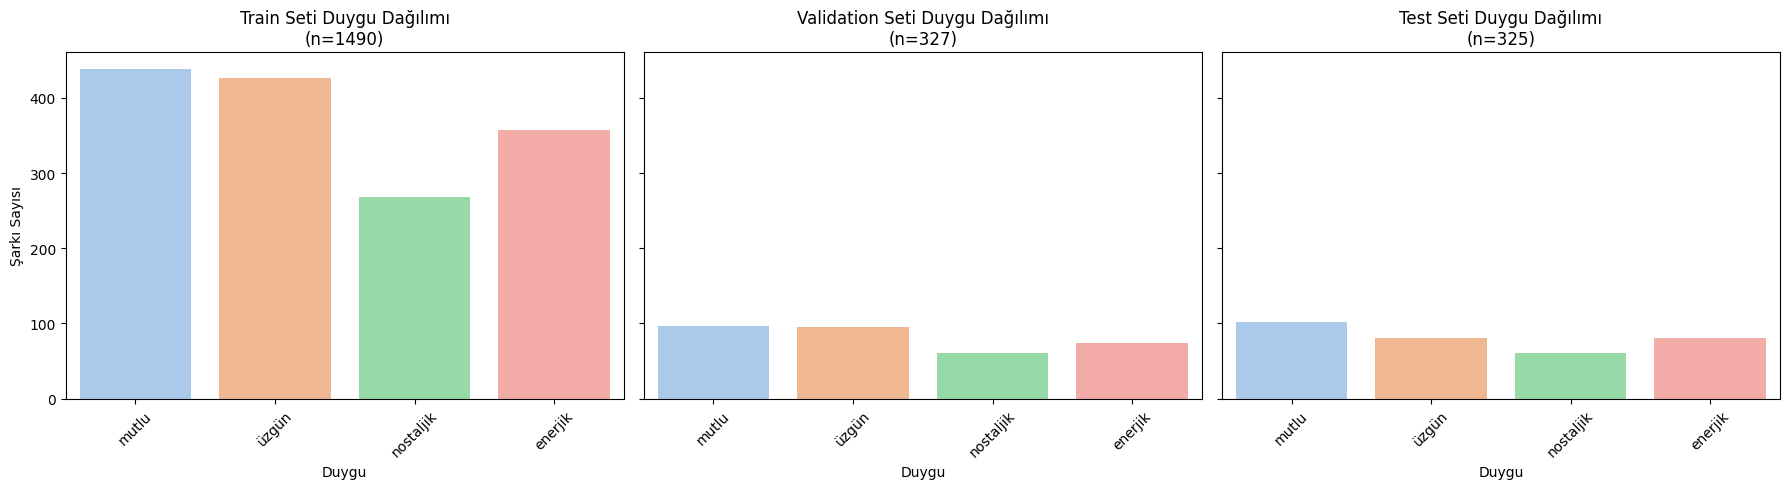

In [ ]:
train_df, val_df, test_df = None, None, None

def create_final_df_from_split(split_file_path, metadata_with_emotions_and_lyrics_info):
    if not os.path.exists(split_file_path):
        print(f"ERROR: TVT file not found: {split_file_path}")
        return None
    if metadata_with_emotions_and_lyrics_info is None or metadata_with_emotions_and_lyrics_info.empty:
        print("ERROR: Processed main metadata (processed_metadata_df) is empty or not loaded.")
        return None

    try:
        split_df_raw = pd.read_csv(split_file_path)
        print(f"\n'{split_file_path}' loaded, {split_df_raw.shape[0]} rows.")
    except Exception as e:
        print(f"ERROR: Problem while reading {split_file_path}: {e}")
        return None

    tvt_id_col_found = None
    possible_tvt_id_cols = ['Song ID', 'Song', 'track_id', 'id']
    for col_name in possible_tvt_id_cols:
        if col_name in split_df_raw.columns:
            tvt_id_col_found = col_name
            break

    if not tvt_id_col_found:
        print(f"ERROR: An expected ID column ('Song ID', 'Song', etc.) not found in the {split_file_path} file.")
        print(f"   Found columns: {split_df_raw.columns.tolist()}")
        return None

    if tvt_id_col_found != 'Song ID':
        split_df_raw.rename(columns={tvt_id_col_found: 'Song ID'}, inplace=True)

    split_df_raw['Song ID'] = split_df_raw['Song ID'].astype(str).str.strip()
    print(f"   '{tvt_id_col_found}' was used as the ID column in the '{split_file_path}' file (mapped to Song ID).")

    merged_df = pd.merge(
        split_df_raw[['Song ID']],
        metadata_with_emotions_and_lyrics_info,
        on='Song ID',
        how='inner'
    )

    if merged_df.empty:
        print(f"WARNING: After merging with main metadata for {split_file_path}, NO songs remain.")
        print(f"   Check: Do the IDs in the TVT file ('{tvt_id_col_found}') match the 'Song ID's in the metadata?")
        return None

    print(f"   '{split_file_path}' merged with the main metadata, {merged_df.shape[0]} matching songs found.")

    lyrics_contents_list = []
    valid_rows_indices = []
    for index, row_data in merged_df.iterrows():
        lyrics = load_lyrics_from_file(row_data['Song ID'], row_data['Quadrant'])
        if lyrics:
            lyrics_contents_list.append(lyrics)
            valid_rows_indices.append(index)

    if not lyrics_contents_list:
        print(f"WARNING: NONE of the songs merged for {split_file_path} could have their lyrics loaded.")
        return None

    final_df_with_lyrics = merged_df.loc[valid_rows_indices].copy()
    final_df_with_lyrics['lyrics'] = lyrics_contents_list

    print(f"   Lyrics loaded, number of valid songs: {final_df_with_lyrics.shape[0]}")

    if final_df_with_lyrics.empty:
        print(f"WARNING: After lyrics loading for {split_file_path}, NO songs remain.")
        return None

    final_df_with_lyrics.rename(columns={'target_emotion_raw': 'emotion_name'}, inplace=True)

    return final_df_with_lyrics[['Song ID', 'lyrics', 'emotion_label', 'emotion_name', 'Quadrant']]


if processed_metadata_df is not None and not processed_metadata_df.empty:
    print(f"\nLoading and processing '{SELECTED_TVT_RATIO}' TVT set...")
    train_df = create_final_df_from_split(TRAIN_SET_FILE, processed_metadata_df)
    val_df = create_final_df_from_split(VALIDATION_SET_FILE, processed_metadata_df)
    test_df = create_final_df_from_split(TEST_SET_FILE, processed_metadata_df)

    data_loaded_successfully = True
    if train_df is None or train_df.empty:
        print(f"KRİTİK UYARI: Train set ({TRAIN_SET_FILE}) YÜKLENEMEDİ veya BOŞ.")
        data_loaded_successfully = False
    else:
        print(f"\nTrain set loaded successfully. Size: {train_df.shape}")
        print(train_df['emotion_name'].value_counts(normalize=True))

    if val_df is None or val_df.empty:
        print(f"KRİTİK UYARI: Validation set ({VALIDATION_SET_FILE}) YÜKLENEMEDİ veya BOŞ.")
        data_loaded_successfully = False
    else:
        print(f"\nValidation set loaded successfully. Size: {val_df.shape}")
        print(val_df['emotion_name'].value_counts(normalize=True))

    if test_df is None or test_df.empty:
        print(f"KRİTİK UYARI: Test set ({TEST_SET_FILE}) YÜKLENEMEDİ veya BOŞ.")
        data_loaded_successfully = False
    else:
        print(f"\nTest set loaded successfully. Size: {test_df.shape}")
        print(test_df['emotion_name'].value_counts(normalize=True))

    if not data_loaded_successfully:
        print("\nPlease CHECK file paths, ID column names in TVT files,")
        print("the emotion mapping in Cell 4, and the lyrics loading logic in Cell 5.")
        train_df, val_df, test_df = None, None, None
else:
    print("KRİTİK HATA: İşlenmiş ana metadata (processed_metadata_df) boş veya yüklenemedi.")
    print("Bu nedenle TVT setleri işlenemiyor. Lütfen Hücre 3 ve 4'ü kontrol edin.")

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- End of Cell 6 Graphics ---")

plot_tvt_distribution = False
fig_tvt, axes_tvt = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

if 'train_df' in locals() and train_df is not None and not train_df.empty:
    sns.countplot(ax=axes_tvt[0], data=train_df, x='emotion_name', order=TARGET_EMOTIONS_LIST, palette="pastel")
    axes_tvt[0].set_title(f'Emotion Distribution of Train Set\n(n={len(train_df)})')
    axes_tvt[0].set_xlabel('Emotion')
    axes_tvt[0].set_ylabel('Number of Songs')
    axes_tvt[0].tick_params(axis='x', rotation=45)
    plot_tvt_distribution = True
else:
    axes_tvt[0].set_title('No Train Set Data')

if 'val_df' in locals() and val_df is not None and not val_df.empty:
    sns.countplot(ax=axes_tvt[1], data=val_df, x='emotion_name', order=TARGET_EMOTIONS_LIST, palette="pastel")
    axes_tvt[1].set_title(f'Emotion Distribution of Validation Set\n(n={len(val_df)})')
    axes_tvt[1].set_xlabel('Emotion')
    axes_tvt[1].set_ylabel('')
    axes_tvt[1].tick_params(axis='x', rotation=45)
    plot_tvt_distribution = True
else:
    axes_tvt[1].set_title('No Validation Set Data')

if 'test_df' in locals() and test_df is not None and not test_df.empty:
    sns.countplot(ax=axes_tvt[2], data=test_df, x='emotion_name', order=TARGET_EMOTIONS_LIST, palette="pastel")
    axes_tvt[2].set_title(f'Emotion Distribution of Test Set\n(n={len(test_df)})')
    axes_tvt[2].set_xlabel('Emotion')
    axes_tvt[2].set_ylabel('')
    axes_tvt[2].tick_params(axis='x', rotation=45)
    plot_tvt_distribution = True
else:
    axes_tvt[2].set_title('No Test Set Data')

if plot_tvt_distribution:
    plt.tight_layout()
    plt.show()
else:
    plt.close(fig_tvt)
    print("No data found for TVT set distribution charts.")

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK 'stopwords' resource...")
    nltk.download('stopwords', quiet=False)
try:
    word_tokenize("test")
except LookupError:
     print("Downloading NLTK 'punkt' (tokenizer) resource...")
     nltk.download('punkt', quiet=False)
try:
    WordNetLemmatizer().lemmatize('lemmas')
except LookupError:
    print("Downloading NLTK 'wordnet' resource...")
    nltk.download('wordnet', quiet=False)
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("Downloading NLTK 'omw-1.4' (Open Multilingual Wordnet) resource...")
    nltk.download('omw-1.4', quiet=False)

try:
    sent_tokenize("test sentence")
except LookupError:
     print("Downloading NLTK 'punkt_tab' (for sent_tokenize) resource...")
     nltk.download('punkt_tab', quiet=False)

print("NLTK resources checked/downloaded.\n")

def preprocess_lyrics_advanced(text_series):
    if not isinstance(text_series, pd.Series):
        print("ERROR: preprocess_lyrics_advanced function must be given a Pandas Series.")
        return None

    stop_words_list = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_texts = []

    for text_idx, text in enumerate(text_series):
        if pd.isna(text) or not isinstance(text, str) or not text.strip():
            processed_texts.append("")
            continue

        text_orig = text
        text = text.lower()
        text = re.sub(r'\\[.*?versi.*?\\].*?\\[.*?\\].*?|\\n', ' ', text, flags=re.IGNORECASE)
        text = re.sub(r'\\[.*?\\]', ' ', text)
        text = re.sub(r'\n+', ' ', text)
        text = re.sub(r'<.*?>', ' ', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()

        if not text.strip():
            processed_texts.append("")
            continue

        try:
             tokens = word_tokenize(text)
        except LookupError:
             print(f"ERROR: word_tokenize could not be run for row {text_idx}. Text: '{text[:100]}...'")
             tokens = []

        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words_list and len(word) > 2]

        final_text = " ".join(lemmatized_tokens)
        processed_texts.append(final_text)

    return pd.Series(processed_texts, index=text_series.index)

if train_df is not None and val_df is not None and test_df is not None:
    print("Applying text preprocessing (stopwords, lemmatization for English)...")

    if 'lyrics' not in train_df.columns:
        print("ERROR: 'lyrics' column not found in train_df!")
    elif 'lyrics' not in val_df.columns:
        print("ERROR: 'lyrics' column not found in val_df!")
    elif 'lyrics' not in test_df.columns:
        print("ERROR: 'lyrics' column not found in test_df!")
    else:
        train_df['processed_lyrics'] = preprocess_lyrics_advanced(train_df['lyrics'])
        val_df['processed_lyrics'] = preprocess_lyrics_advanced(val_df['lyrics'])
        test_df['processed_lyrics'] = preprocess_lyrics_advanced(test_df['lyrics'])

        print("\nPreprocessed sample lyrics (first valid from train set):")
        sample_processed_lyric = train_df[train_df['processed_lyrics'].str.strip().astype(bool)]['processed_lyrics'].iloc[0] if not train_df[train_df['processed_lyrics'].str.strip().astype(bool)].empty else "Not Found"
        print(sample_processed_lyric[:300] + "..." if sample_processed_lyric != "Not Found" else "Processed sample not found.")

        train_df_len_before = len(train_df)
        val_df_len_before = len(val_df)
        test_df_len_before = len(test_df)

        train_df = train_df[train_df['processed_lyrics'].str.strip().astype(bool)].copy()
        val_df = val_df[val_df['processed_lyrics'].str.strip().astype(bool)].copy()
        test_df = test_df[test_df['processed_lyrics'].str.strip().astype(bool)].copy()

        print(f"\nTrain size after preprocessing (empty ones removed): {train_df.shape} (before: {train_df_len_before})")
        print(f"Val size after preprocessing (empty ones removed): {val_df.shape} (before: {val_df_len_before})")
        print(f"Test size after preprocessing (empty ones removed): {test_df.shape} (before: {test_df_len_before})")

        if train_df.empty or val_df.empty:
            print("WARNING: One of the Train or Val sets became empty after preprocessing. This may affect subsequent steps.")
else:
    print("Text preprocessing skipped because the data sets (train_df, val_df, test_df) were not loaded properly.")

NLTK 'stopwords' kaynağı indiriliyor...
NLTK 'punkt' (tokenizer) kaynağı indiriliyor...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'wordnet' kaynağı indiriliyor...
NLTK 'omw-1.4' (Open Multilingual Wordnet) kaynağı indiriliyor...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK 'punkt_tab' (sent_tokenize için) kaynağı indiriliyor...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK kaynakları kontrol edildi/indirildi.

Metin ön işleme uygulanıyor (İngilizce için stopwords, lemmatization)...

Ön işlenmiş örnek şarkı sözü (train setinden ilk geçerli olan):
want find moon go leaf western sky night dissolve morning azure turn gold azure turn gold gon sleep one eye open gon keep shade half drawn nearly silent dressed shadow line color fall line color fall gon watch window watched smile know wont tell watch watch know moon go leaf western sky night dissol...

Ön işleme sonrası (boş olanlar çıkarıldı) Train boyutu: (1490, 6) (önce: 1490)
Ön işleme sonrası (boş olanlar çıkarıldı) Val boyutu: (327, 6) (önce: 327)
Ön işleme sonrası (boş olanlar çıkarıldı) Test boyutu: (325, 6) (önce: 325)


In [ ]:
X_train_tfidf, X_val_tfidf, X_test_tfidf = None, None, None
y_train, y_val, y_test = None, None, None
tfidf_vectorizer = None

if train_df is not None and val_df is not None and test_df is not None:
    if not train_df.empty and not val_df.empty and not test_df.empty:
        print("\nExtracting TF-IDF features...")
        tfidf_vectorizer = TfidfVectorizer(
            max_features=7000,
            ngram_range=(1, 2),
            min_df=5,
            max_df=0.8
        )

        X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_lyrics'])
        X_val_tfidf = tfidf_vectorizer.transform(val_df['processed_lyrics'])
        X_test_tfidf = tfidf_vectorizer.transform(test_df['processed_lyrics'])

        y_train = train_df['emotion_label']
        y_val = val_df['emotion_label']
        y_test = test_df['emotion_label']

        print(f"TF-IDF matrix dimensions:")
        print(f"Train: X_train_tfidf {X_train_tfidf.shape}, y_train {y_train.shape}")
        print(f"Validation: X_val_tfidf {X_val_tfidf.shape}, y_val {y_val.shape}")
        print(f"Test: X_test_tfidf {X_test_tfidf.shape}, y_test {y_test.shape}")
    else:
        print("One of the Train, Val, or Test DataFrames is empty after preprocessing. TF-IDF could not be created.")
else:
    print("TF-IDF feature extraction skipped because the data sets (train_df, val_df, test_df) were not loaded.")


TF-IDF özellikleri çıkarılıyor...
TF-IDF matris boyutları:
Train: X_train_tfidf (1490, 3975), y_train (1490,)
Validation: X_val_tfidf (327, 3975), y_val (327,)
Test: X_test_tfidf (325, 3975), y_test (325,)



Logistic Regression Modeli Eğitiliyor (TF-IDF)...

--- Logistic Regression - Validation Seti Performansı ---
Accuracy: 0.4801
              precision    recall  f1-score   support

       mutlu       0.56      0.56      0.56        97
       üzgün       0.51      0.48      0.50        95
   nostaljik       0.31      0.18      0.23        61
     enerjik       0.43      0.62      0.51        74

    accuracy                           0.48       327
   macro avg       0.46      0.46      0.45       327
weighted avg       0.47      0.48      0.47       327


--- Logistic Regression - Test Seti Performansı ---
Accuracy: 0.5415
              precision    recall  f1-score   support

       mutlu       0.63      0.61      0.62       102
       üzgün       0.51      0.62      0.56        81
   nostaljik       0.40      0.26      0.32        61
     enerjik       0.55      0.59      0.57        81

    accuracy                           0.54       325
   macro avg       0.52      0.52      0.5

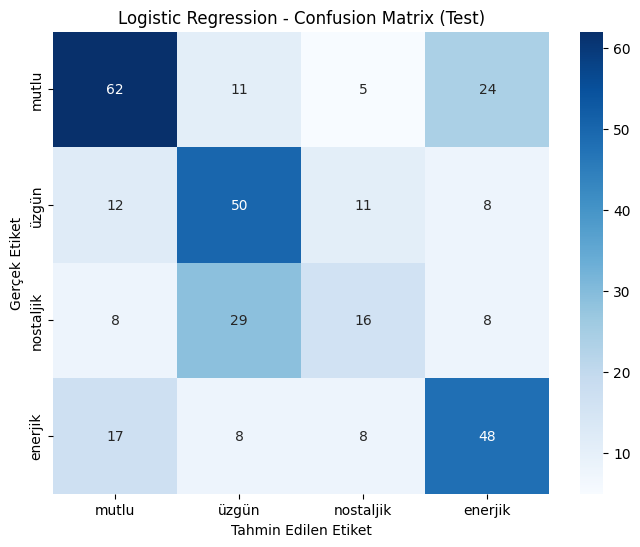


--- Hücre 9 Sonu Ek Grafikleri ---


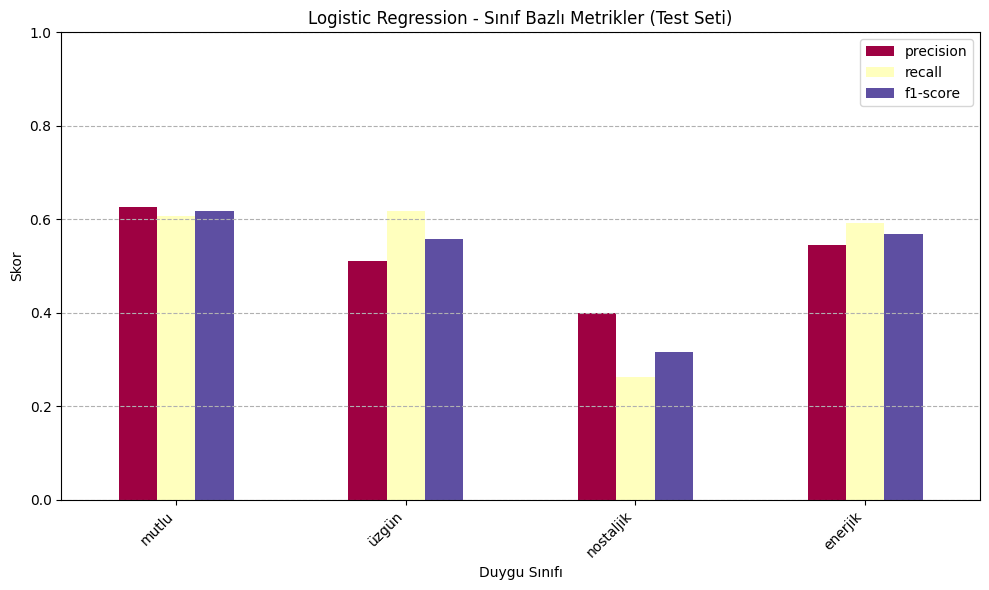

In [ ]:
report_target_names = TARGET_EMOTIONS_LIST

if X_train_tfidf is not None and y_train is not None and X_val_tfidf is not None and y_val is not None and X_test_tfidf is not None and y_test is not None:
    print("\nTraining Logistic Regression Model (TF-IDF)...")
    lr_model = LogisticRegression(
        solver='liblinear',
        C=1.0,
        multi_class='ovr',
        random_state=SEED,
        class_weight='balanced'
    )
    lr_model.fit(X_train_tfidf, y_train)

    print("\n--- Logistic Regression - Validation Set Performance ---")
    y_pred_lr_val = lr_model.predict(X_val_tfidf)
    print(f"Accuracy: {accuracy_score(y_val, y_pred_lr_val):.4f}")
    print(classification_report(y_val, y_pred_lr_val, target_names=report_target_names, zero_division=0))

    print("\n--- Logistic Regression - Test Set Performance ---")
    y_pred_lr_test = lr_model.predict(X_test_tfidf)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_test):.4f}")
    print(classification_report(y_test, y_pred_lr_test, target_names=report_target_names, zero_division=0))

    print("\nLogistic Regression - Test Set Confusion Matrix:")
    cm_lr = confusion_matrix(y_test, y_pred_lr_test, labels=list(EMOTION_TO_INT_MAPPING.values()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=report_target_names, yticklabels=report_target_names)
    plt.title('Logistic Regression - Confusion Matrix (Test)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("Logistic Regression training skipped because TF-IDF features or labels were not created/loaded.")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

print("\n--- End of Cell 9 Additional Graphics ---")

if 'y_test' in locals() and 'y_pred_lr_test' in locals() and 'report_target_names' in locals():
    try:
        report_lr = classification_report(y_test, y_pred_lr_test, target_names=report_target_names, output_dict=True, zero_division=0)
        df_report_lr = pd.DataFrame(report_lr).transpose()
        df_class_metrics_lr = df_report_lr[df_report_lr.index.isin(report_target_names)]

        if not df_class_metrics_lr.empty:
            df_class_metrics_lr[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap="Spectral")
            plt.title('Logistic Regression - Class-Based Metrics (Test Set)')
            plt.ylabel('Score')
            plt.xlabel('Emotion Class')
            plt.xticks(rotation=45, ha='right')
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("Class-based metrics for Logistic Regression could not be created (report is empty).")
    except Exception as e:
        print(f"Error while drawing Logistic Regression metric graph: {e}")
else:
    print("Required variables (y_test, y_pred_lr_test) for Logistic Regression metric graph not found.")


SVM Modeli Eğitiliyor (TF-IDF)...

--- SVM - Validation Seti Performansı ---
Accuracy: 0.4404
              precision    recall  f1-score   support

       mutlu       0.64      0.24      0.35        97
       üzgün       0.38      0.82      0.52        95
   nostaljik       0.50      0.02      0.03        61
     enerjik       0.51      0.57      0.54        74

    accuracy                           0.44       327
   macro avg       0.51      0.41      0.36       327
weighted avg       0.51      0.44      0.38       327


--- SVM - Test Seti Performansı ---
Accuracy: 0.4092
              precision    recall  f1-score   support

       mutlu       0.69      0.18      0.28       102
       üzgün       0.33      0.89      0.48        81
   nostaljik       0.50      0.02      0.03        61
     enerjik       0.52      0.52      0.52        81

    accuracy                           0.41       325
   macro avg       0.51      0.40      0.33       325
weighted avg       0.52      0.41   

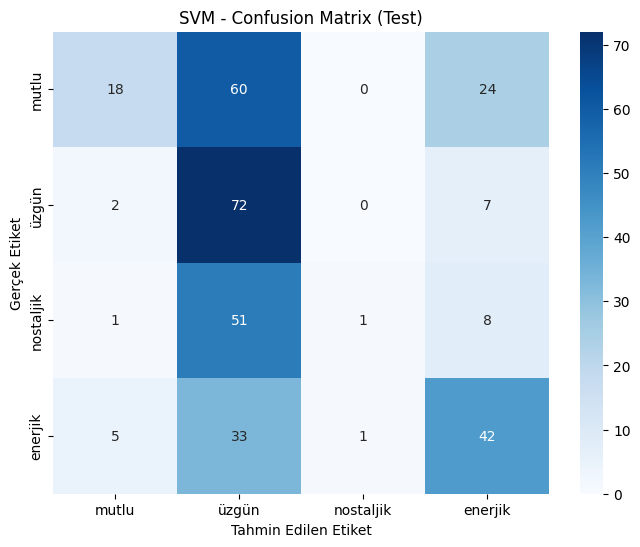


--- Hücre 10 Sonu Ek Grafikleri ---


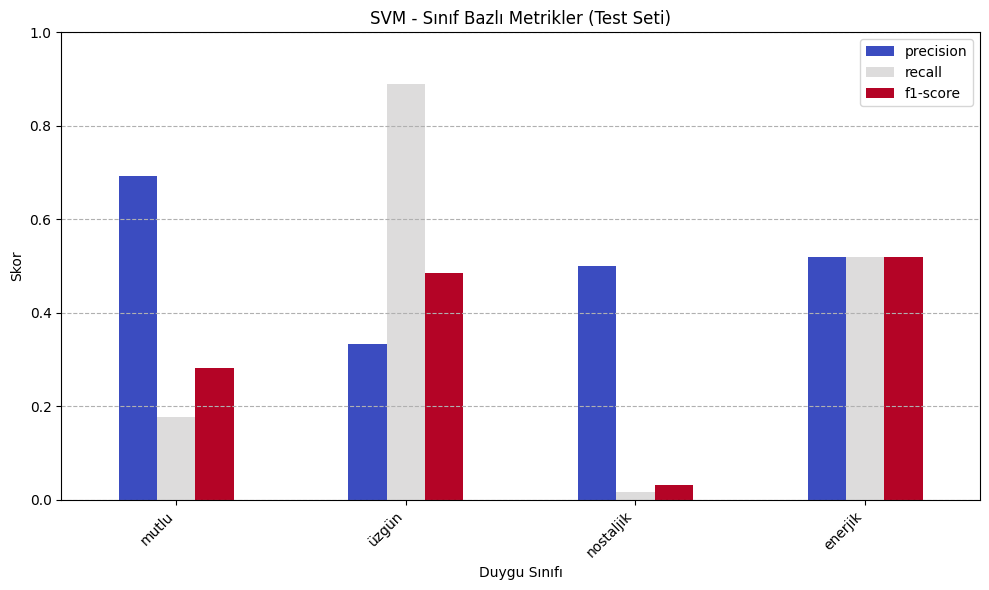

In [ ]:
if X_train_tfidf is not None and y_train is not None and X_val_tfidf is not None and y_val is not None and X_test_tfidf is not None and y_test is not None:
    print("\nTraining SVM Model (TF-IDF)...")
    svm_model = SVC(
        kernel='linear',
        C=0.1,
        random_state=SEED,
        class_weight='balanced',
        probability=False
    )
    svm_model.fit(X_train_tfidf, y_train)

    print("\n--- SVM - Validation Set Performance ---")
    y_pred_svm_val = svm_model.predict(X_val_tfidf)
    print(f"Accuracy: {accuracy_score(y_val, y_pred_svm_val):.4f}")
    print(classification_report(y_val, y_pred_svm_val, target_names=report_target_names, zero_division=0))

    print("\n--- SVM - Test Set Performance ---")
    y_pred_svm_test = svm_model.predict(X_test_tfidf)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_test):.4f}")
    print(classification_report(y_test, y_pred_svm_test, target_names=report_target_names, zero_division=0))

    print("\nSVM - Test Set Confusion Matrix:")
    cm_svm = confusion_matrix(y_test, y_pred_svm_test, labels=list(EMOTION_TO_INT_MAPPING.values()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
                xticklabels=report_target_names, yticklabels=report_target_names)
    plt.title('SVM - Confusion Matrix (Test)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("SVM training skipped because TF-IDF features or labels were not created/loaded.")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

print("\n--- End of Cell 10 Additional Graphics ---")

if 'y_test' in locals() and 'y_pred_svm_test' in locals() and 'report_target_names' in locals():
    try:
        report_svm = classification_report(y_test, y_pred_svm_test, target_names=report_target_names, output_dict=True, zero_division=0)
        df_report_svm = pd.DataFrame(report_svm).transpose()
        df_class_metrics_svm = df_report_svm[df_report_svm.index.isin(report_target_names)]

        if not df_class_metrics_svm.empty:
            df_class_metrics_svm[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap="coolwarm")
            plt.title('SVM - Class-Based Metrics (Test Set)')
            plt.ylabel('Score')
            plt.xlabel('Emotion Class')
            plt.xticks(rotation=45, ha='right')
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("Class-based metrics for SVM could not be created (report is empty).")
    except Exception as e:
        print(f"Error while drawing SVM metric graph: {e}")
else:
    print("Required variables (y_test, y_pred_svm_test) for SVM metric graph not found.")

In [ ]:
bert_tokenizer = None
tokenized_train_hf_dataset, tokenized_val_hf_dataset, tokenized_test_hf_dataset = None, None, None

if 'train_df' in locals() and train_df is not None and \
   'val_df' in locals() and val_df is not None and \
   'test_df' in locals() and test_df is not None:

    if not train_df.empty and not val_df.empty and not test_df.empty and \
       'lyrics' in train_df.columns and 'emotion_label' in train_df.columns:

        print(f"\nLoading Tokenizer for BERT: {BERT_MODEL_NAME}")
        try:
            bert_tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)
        except Exception as e:
            print(f"ERROR: BERT Tokenizer ({BERT_MODEL_NAME}) could not be loaded: {e}")
            bert_tokenizer = None

        if bert_tokenizer:
            print("Creating Hugging Face Dataset objects and performing tokenization...")
            try:
                train_hf_dataset = Dataset.from_pandas(train_df[['lyrics', 'emotion_label']])
                val_hf_dataset = Dataset.from_pandas(val_df[['lyrics', 'emotion_label']])
                test_hf_dataset = Dataset.from_pandas(test_df[['lyrics', 'emotion_label']])
            except KeyError as e:
                print(f"ERROR: Required columns not found in DataFrame: {e}")
                tokenized_train_hf_dataset, tokenized_val_hf_dataset, tokenized_test_hf_dataset = None, None, None
                bert_tokenizer = None

            if train_hf_dataset:
                def tokenize_bert_function(examples):
                    lyrics_text = [str(text) if pd.notnull(text) else "" for text in examples["lyrics"]]
                    return bert_tokenizer(
                        lyrics_text,
                        padding="max_length",
                        truncation=True,
                        max_length=BERT_MAX_LEN
                    )

                tokenized_train_hf_dataset = train_hf_dataset.map(tokenize_bert_function, batched=True)
                tokenized_val_hf_dataset = val_hf_dataset.map(tokenize_bert_function, batched=True)
                tokenized_test_hf_dataset = test_hf_dataset.map(tokenize_bert_function, batched=True)

                tokenized_train_hf_dataset = tokenized_train_hf_dataset.rename_column("emotion_label", "labels")
                tokenized_val_hf_dataset = tokenized_val_hf_dataset.rename_column("emotion_label", "labels")
                tokenized_test_hf_dataset = tokenized_test_hf_dataset.rename_column("emotion_label", "labels")

                tokenized_train_hf_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
                tokenized_val_hf_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
                tokenized_test_hf_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

                print("\nTokenization for BERT completed.")
                if len(tokenized_train_hf_dataset) > 0:
                     print("\nSample tokenized data (first item from train set):")
                     print(tokenized_train_hf_dataset[0])
                else:
                     print("Tokenized train dataset (tokenized_train_hf_dataset) is empty.")
    else:
        print("One of the Train, Val, or Test DataFrames is empty or missing required ('lyrics', 'emotion_label') columns. BERT preparation cannot be done.")
else:
    print("BERT preparation skipped because the data sets (train_df, val_df, test_df) were not loaded.")

Veri setleri (train_df, val_df, test_df) yüklenmediği için BERT hazırlığı atlandı.
BERT trainer log history bulunamadı veya boş.


In [ ]:
bert_classification_model = None
bert_trainer = None
y_true_bert_test_labels = None
y_pred_bert_test_labels = None
test_results_bert = None

if 'tokenized_train_hf_dataset' in locals() and tokenized_train_hf_dataset is not None and len(tokenized_train_hf_dataset) > 0 and \
   'tokenized_val_hf_dataset' in locals() and tokenized_val_hf_dataset is not None and len(tokenized_val_hf_dataset) > 0 and \
   'tokenized_test_hf_dataset' in locals() and tokenized_test_hf_dataset is not None and len(tokenized_test_hf_dataset) > 0 and \
   'bert_tokenizer' in locals() and bert_tokenizer is not None:

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device to be used for BERT model: {device}")
    if str(device) == "cpu":
        print("WARNING: Training the BERT model on CPU will be very slow. It is strongly recommended to change the Runtime to GPU.")

    print(f"\nLoading BERT classification model: {BERT_MODEL_NAME}")
    try:
        bert_classification_model = BertForSequenceClassification.from_pretrained(
            BERT_MODEL_NAME,
            num_labels=NUM_LABELS,
            output_attentions=False,
            output_hidden_states=False
        ).to(device)
    except Exception as e:
        print(f"ERROR: BERT Classification Model ({BERT_MODEL_NAME}) could not be loaded: {e}")
        bert_classification_model = None

    if bert_classification_model:
        print("Preparing evaluation metrics (from evaluate library)...")
        try:
            accuracy_metric_hf = evaluate.load("accuracy")
            f1_metric_hf = evaluate.load("f1")

            def compute_bert_metrics(eval_pred):
                logits, labels = eval_pred
                predictions = np.argmax(logits, axis=-1)
                acc_results = accuracy_metric_hf.compute(predictions=predictions, references=labels)
                f1_results = f1_metric_hf.compute(predictions=predictions, references=labels, average="weighted")
                return {
                    "accuracy": acc_results["accuracy"],
                    "f1": f1_results["f1"],
                }

            print("Preparing BERT Training Arguments...")
            num_train_examples = len(tokenized_train_hf_dataset)
            steps_per_epoch = (num_train_examples // BERT_BATCH_SIZE) + (1 if num_train_examples % BERT_BATCH_SIZE != 0 else 0)
            print(f"Number of examples in the train set: {num_train_examples}")
            print(f"Batch size (BERT_BATCH_SIZE): {BERT_BATCH_SIZE}")
            print(f"Number of steps per epoch (steps_per_epoch): {steps_per_epoch}")

            training_args_bert = TrainingArguments(
                output_dir=BERT_OUTPUT_DIR,
                num_train_epochs=BERT_EPOCHS,
                per_device_train_batch_size=BERT_BATCH_SIZE,
                per_device_eval_batch_size=BERT_BATCH_SIZE,
                warmup_steps=max(100, int(steps_per_epoch * BERT_EPOCHS * 0.1)),
                weight_decay=0.01,
                logging_dir=f'{BERT_OUTPUT_DIR}/logs',
                logging_strategy="steps",
                logging_steps=max(1, steps_per_epoch // 5),
                eval_strategy="steps",
                eval_steps=steps_per_epoch,
                save_strategy="steps",
                save_steps=steps_per_epoch,
                load_best_model_at_end=True,
                metric_for_best_model="f1",
                greater_is_better=True,
                report_to="none",
            )

            bert_trainer = Trainer(
                model=bert_classification_model,
                args=training_args_bert,
                train_dataset=tokenized_train_hf_dataset,
                eval_dataset=tokenized_val_hf_dataset,
                compute_metrics=compute_bert_metrics,
                callbacks=[EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=0.001)]
            )

            print("\nStarting BERT Model Training...")
            try:
                train_result = bert_trainer.train()
                print("BERT training completed.")

                if bert_trainer is not None and hasattr(bert_trainer, 'state') and bert_trainer.state.log_history:
                    log_history = bert_trainer.state.log_history
                    epochs_val = []
                    train_loss_val = []
                    eval_loss_val = []
                    eval_accuracy_val = []
                    eval_f1_val = []

                    from collections import defaultdict
                    epoch_data = defaultdict(lambda: {'train_loss': None, 'eval_loss': None, 'eval_accuracy': None, 'eval_f1': None})

                    for log_entry in log_history:
                        epoch = log_entry.get('epoch')
                        if epoch is None: continue
                        epoch = round(epoch, 2)

                        if 'loss' in log_entry:
                            epoch_data[epoch]['train_loss'] = log_entry['loss']
                        if 'eval_loss' in log_entry:
                            epoch_data[epoch]['eval_loss'] = log_entry['eval_loss']
                        if 'eval_accuracy' in log_entry:
                            epoch_data[epoch]['eval_accuracy'] = log_entry['eval_accuracy']
                        if 'eval_f1' in log_entry:
                            epoch_data[epoch]['eval_f1'] = log_entry['eval_f1']

                    sorted_epochs = sorted(epoch_data.keys())

                    train_loss_plot = [epoch_data[e]['train_loss'] for e in sorted_epochs if epoch_data[e]['train_loss'] is not None]
                    epochs_for_train_loss = [e for e in sorted_epochs if epoch_data[e]['train_loss'] is not None]

                    eval_loss_plot = [epoch_data[e]['eval_loss'] for e in sorted_epochs if epoch_data[e]['eval_loss'] is not None]
                    eval_accuracy_plot = [epoch_data[e]['eval_accuracy'] for e in sorted_epochs if epoch_data[e]['eval_accuracy'] is not None]
                    eval_f1_plot = [epoch_data[e]['eval_f1'] for e in sorted_epochs if epoch_data[e]['eval_f1'] is not None]

                    epochs_for_eval_metrics = [e for e in sorted_epochs if epoch_data[e]['eval_loss'] is not None]


                    if len(epochs_for_eval_metrics) > 1:
                        plt.figure(figsize=(14, 6))

                        plt.subplot(1, 2, 1)
                        if train_loss_plot and epochs_for_train_loss:
                             plt.plot(epochs_for_train_loss, train_loss_plot, label='Training Loss', marker='o', linestyle='--')
                        if eval_loss_plot and epochs_for_eval_metrics:
                             plt.plot(epochs_for_eval_metrics, eval_loss_plot, label='Validation Loss', marker='o', linestyle='-')
                        plt.title('BERT - Training and Validation Loss')
                        plt.xlabel('Epoch')
                        plt.ylabel('Loss')
                        plt.legend()
                        plt.grid(True)

                        plt.subplot(1, 2, 2)
                        if eval_accuracy_plot and epochs_for_eval_metrics:
                             plt.plot(epochs_for_eval_metrics, eval_accuracy_plot, label='Validation Accuracy', marker='s', color='green', linestyle='-')
                        if eval_f1_plot and epochs_for_eval_metrics:
                             plt.plot(epochs_for_eval_metrics, eval_f1_plot, label='Validation F1-Score (Weighted)', marker='x', color='purple', linestyle='-')
                        plt.title('BERT - Validation Metrics')
                        plt.xlabel('Epoch')
                        plt.ylabel('Score')
                        plt.legend()
                        plt.grid(True)
                        plt.ylim(0, 1)

                        plt.tight_layout()
                        plt.show()
                    else:
                        print("Not enough epoch/evaluation data found in BERT training logs (check log_history).")
                else:
                    print("BERT trainer log history not found or is empty (after training).")

                print("\n--- BERT - Validation Set Performance (Best Model) ---\n")
                val_results_bert = bert_trainer.evaluate(eval_dataset=tokenized_val_hf_dataset)
                print("Validation Set Results:")
                for key, value in val_results_bert.items(): print(f"  {key}: {value:.4f}")

                print("\n--- BERT - Test Set Performance (Best Model) ---\n")
                test_results_bert = bert_trainer.evaluate(eval_dataset=tokenized_test_hf_dataset)
                print("Test Set Results:")
                for key, value in test_results_bert.items(): print(f"  {key}: {value:.4f}")

                print("\nPredicting on test set...")
                predictions_output_bert = bert_trainer.predict(tokenized_test_hf_dataset)
                y_pred_bert_logits = predictions_output_bert.predictions
                y_pred_bert_test_labels = np.argmax(y_pred_bert_logits, axis=1)
                y_true_bert_test_labels = predictions_output_bert.label_ids

                print("\nBERT - Test Set Classification Report (Best Model):\n")
                print(classification_report(y_true_bert_test_labels, y_pred_bert_test_labels,
                                            target_names=report_target_names, zero_division=0))

                print("\nBERT - Test Set Confusion Matrix (Best Model):\n")
                cm_bert = confusion_matrix(y_true_bert_test_labels, y_pred_bert_test_labels, labels=list(EMOTION_TO_INT_MAPPING.values()))
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
                            xticklabels=report_target_names, yticklabels=report_target_names)
                plt.title(f'BERT ({BERT_MODEL_NAME}) - Confusion Matrix (Test)')
                plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.show()

            except RuntimeError as e:
                if "out of memory" in str(e).lower():
                    print("\nKRİTİK HATA: CUDA out of memory!")
                    print("Öneriler:")
                    print("  - BERT_BATCH_SIZE'ı düşürün (Hücre 2'de, örn: 4, 2).")
                    print("  - BERT_MAX_LEN'i kısaltın (Hücre 2'de, örn: 64, 32).")
                    print("  - TrainingArguments'te 'gradient_accumulation_steps' kullanın (örn: 2, 4).")
                    print("  - TrainingArguments'te 'fp16=False' yapın (eğer True ise veya yorum satırını kaldırın).")
                    print("  - Colab'da GPU belleğini boşaltmak için Runtime -> Restart runtime yapıp tüm hücreleri baştan çalıştırın.")
                else: print(f"A runtime error occurred during BERT training: {e}")
            except Exception as e:
                print(f"A general error occurred during BERT training: {e}")
        except Exception as e:
            print(f"An error occurred while loading metrics or preparing compute_metrics/TrainingArguments/Trainer: {e}")
            bert_trainer = None

else:
    print("BERT training skipped because the required data sets, tokenizer, or model could not be loaded/prepared.")
    print("Please check the outputs in Cell 11 and the previous data loading steps.")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

print("\n--- End of Cell 12 Additional Graphics ---")

if 'y_true_bert_test_labels' in locals() and y_true_bert_test_labels is not None and \
   'y_pred_bert_test_labels' in locals() and y_pred_bert_test_labels is not None and \
   'report_target_names' in locals():
    try:
        report_bert_test_dict = classification_report(y_true_bert_test_labels, y_pred_bert_test_labels, target_names=report_target_names, output_dict=True, zero_division=0)
        df_report_bert_test = pd.DataFrame(report_bert_test_dict).transpose()
        df_class_metrics_bert_test = df_report_bert_test[df_report_bert_test.index.isin(report_target_names)]

        if not df_class_metrics_bert_test.empty:
            df_class_metrics_bert_test[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap="viridis")
            plt.title(f'BERT ({BERT_MODEL_NAME}) - Class-Based Metrics (Test Set)')
            plt.ylabel('Score')
            plt.xlabel('Emotion Class')
            plt.xticks(rotation=45, ha='right')
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("Class-based metrics (test) for BERT could not be created (report is empty).")
    except Exception as e:
        print(f"Error while drawing BERT metric graph (test): {e}")
else:
    print("Required variables (y_true_bert_test_labels, y_pred_bert_test_labels) for BERT metric graph (test) not found.")

BERT için gerekli veri setleri, tokenizer veya model yüklenemediği/hazırlanamadığı için BERT eğitimi atlandı.
Lütfen Hücre 11'deki çıktıları ve önceki veri yükleme adımlarını kontrol edin.

--- Hücre 12 Sonu Ek Grafikleri ---
BERT metrik grafiği (test) için gerekli değişkenler (y_true_bert_test_labels, y_pred_bert_test_labels) bulunamadı.



--- Model Karşılaştırma Grafikleri ---
UYARI: BERT test sonuçları (test_results_bert) bulunamadı.


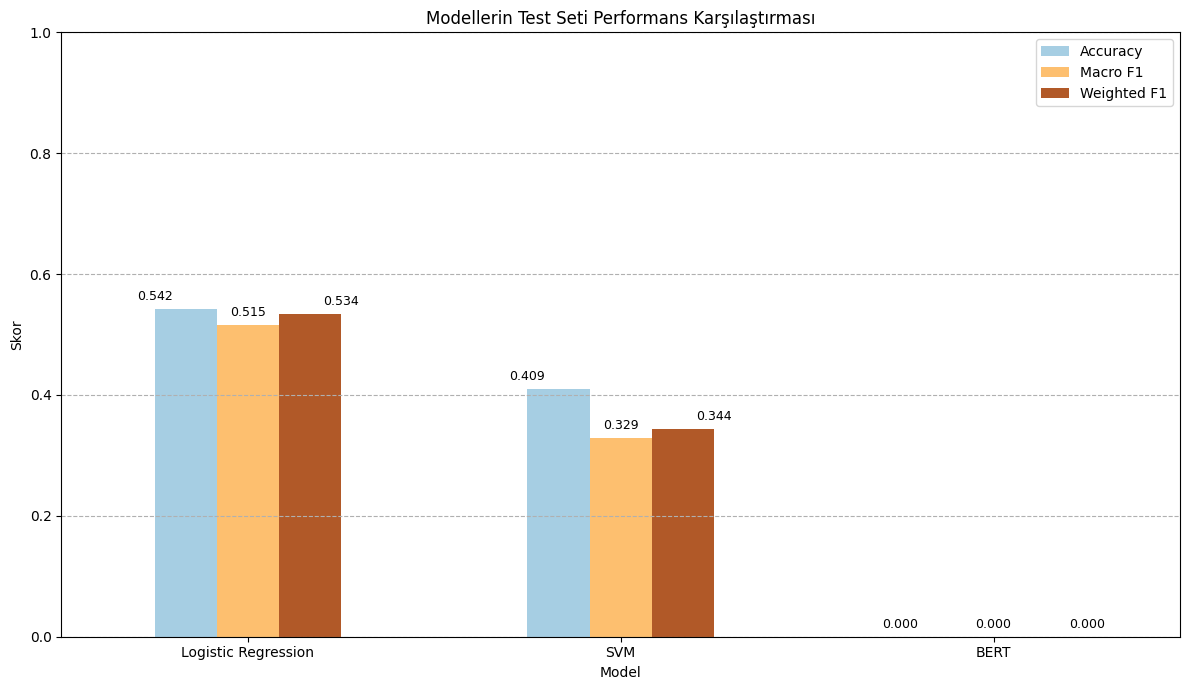

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Model Comparison Graphics ---")

model_names = ['Logistic Regression', 'SVM', 'BERT']
accuracies_test = []
f1_scores_macro_test = []
f1_scores_weighted_test = []

if 'y_test' in locals() and 'y_pred_lr_test' in locals():
    accuracies_test.append(accuracy_score(y_test, y_pred_lr_test))
    report_lr_test = classification_report(y_test, y_pred_lr_test, output_dict=True, zero_division=0)
    f1_scores_macro_test.append(report_lr_test['macro avg']['f1-score'])
    f1_scores_weighted_test.append(report_lr_test['weighted avg']['f1-score'])
else:
    accuracies_test.append(0); f1_scores_macro_test.append(0); f1_scores_weighted_test.append(0)
    print("WARNING: Logistic Regression test results not found.")

if 'y_test' in locals() and 'y_pred_svm_test' in locals():
    accuracies_test.append(accuracy_score(y_test, y_pred_svm_test))
    report_svm_test = classification_report(y_test, y_pred_svm_test, output_dict=True, zero_division=0)
    f1_scores_macro_test.append(report_svm_test['macro avg']['f1-score'])
    f1_scores_weighted_test.append(report_svm_test['weighted avg']['f1-score'])
else:
    accuracies_test.append(0); f1_scores_macro_test.append(0); f1_scores_weighted_test.append(0)
    print("WARNING: SVM test results not found.")

if 'test_results_bert' in locals() and test_results_bert is not None:
    if 'y_true_bert_test_labels' in locals() and 'y_pred_bert_test_labels' in locals():
        accuracies_test.append(accuracy_score(y_true_bert_test_labels, y_pred_bert_test_labels))
        report_bert_test = classification_report(y_true_bert_test_labels, y_pred_bert_test_labels, output_dict=True, zero_division=0)
        f1_scores_macro_test.append(report_bert_test['macro avg']['f1-score'])
        f1_scores_weighted_test.append(report_bert_test['weighted avg']['f1-score'])
    else:
        accuracies_test.append(0); f1_scores_macro_test.append(0); f1_scores_weighted_test.append(0)
        print("UYARI: BERT test tahminleri (y_true_bert_test_labels, y_pred_bert_test_labels) bulunamadı.")
else:
    accuracies_test.append(0); f1_scores_macro_test.append(0); f1_scores_weighted_test.append(0)
    print("WARNING: BERT test results (test_results_bert) not found.")

if sum(accuracies_test) > 0 :
    df_comparison = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies_test,
        'Macro F1': f1_scores_macro_test,
        'Weighted F1': f1_scores_weighted_test
    })

    df_comparison.set_index('Model').plot(kind='bar', figsize=(12, 7), colormap="Paired")
    plt.title('Model Test Set Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--')
    for i, model_type in enumerate(df_comparison['Model']):
        plt.text(i - 0.25, df_comparison['Accuracy'][i] + 0.01, f"{df_comparison['Accuracy'][i]:.3f}", ha='center', va='bottom', fontsize=9, color='black')
        plt.text(i + 0.00, df_comparison['Macro F1'][i] + 0.01, f"{df_comparison['Macro F1'][i]:.3f}", ha='center', va='bottom', fontsize=9, color='black')
        plt.text(i + 0.25, df_comparison['Weighted F1'][i] + 0.01, f"{df_comparison['Weighted F1'][i]:.3f}", ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough results found to compare the models.")